# RDFLib : RDF 작동 패키지
* RDF/XML, N3, Ntriples, N-Quads, Turtle, Trix, RDFa, MicroData 파서, 직렬변환
* Graph 인터페이스 제공
* SPARQL 1.1 지원

In [1]:
#!pip install rdflib

In [2]:
#!pip install pydotplus
#!pip install graphviz

In [3]:
#!pip install networkx

# Import

In [1]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
import os

# RDF 그래프 그려주는 거
import io
from io import StringIO, BytesIO
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

# Basic

In [5]:
g = rdflib.Graph()

In [6]:
result = g.parse('http://www.w3.org/People/Berners-Lee/card')

In [7]:
print('Graph has %s statements.'% len(g))

Graph has 86 statements.


In [8]:
for s, p, o in g:
    if (s, p, o) not in g:
        raise Exception('It Better!')
        
s = g.serialize(format = 'n3')

In [9]:
#print(s)

# Creating RDF Triples
* RDF : URL 레퍼런스, 공백 노드, 문자값 등이 포함된 그래프
    * URL 레퍼런스 : 클래스 URIRef
    * 공백 노드 : 클래스 BNode
    * 문자값 : 클래스 Literal
* URIRef, Bnode는 사람, 회사, 웹사이트 등 리소스로 간주됨
    * Bnode : URI가 없는 것
    * URIRefs : RDF그래프에서 속성이나 서술어(관계) 표현 시 사용됨
    * Literal : 이름, 날짜, 숫자 등 속성값을 가짐

In [10]:
bob = rdflib.URIRef('http://example.org/people/Bob')
linda = rdflib.BNode() 
name = rdflib.Literal('Bob')
age = rdflib.Literal(24)
height = rdflib.Literal(70)

* 같은 namespace(같은 Prefix를 가진 URI)에 여러개의 URIRef는 rdflib.namespace.Namespace 클래스를 가짐

In [11]:
n = rdflib.Namespace('http://example.org/people/')

In [12]:
n.bob

rdflib.term.URIRef('http://example.org/people/bob')

In [13]:
n.eve

rdflib.term.URIRef('http://example.org/people/eve')

In [14]:
pprint(rdflib.namespace.RDF.type)

Pretty printing has been turned OFF


In [15]:
pprint(rdflib.namespace.FOAF.type)

Pretty printing has been turned ON


# XML to RDF-XML with Python
* `g.serialize()`

## Example 1

In [16]:
file_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Lectures/2022-2_온톨로지공학/Github/Dataset'

In [28]:
file_name = 'students.xml'

In [29]:
file_path = os.path.join(file_dir, file_name)

In [30]:
g.serialize(file_path, format = 'pretty-xml')

<Graph identifier=N8b51ff2649384f4bb83dec4bc3cd0633 (<class 'rdflib.graph.Graph'>)>

In [31]:
with open(file_path) as fp:
    print(fp.read())

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
  xmlns:ns4="http://example.org/ns/foo/"
  xmlns="http://example.org/ns2#"
  xmlns:ns2="https://www.w3.org/TeamSubmission/turtle/tests/"
  xmlns:ns3="http://example.org/ns/foo/bar#"
  xmlns:ns1="http://example.org/ns/"
  xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/ns/a2">
    <ns1:b2 rdf:resource="http://example.org/ns/c2"/>
  </rdf:Description>
  <rdf:Description rdf:about="https://www.w3.org/TeamSubmission/turtle/tests/a1">
    <ns2:b1 rdf:resource="https://www.w3.org/TeamSubmission/turtle/tests/c1"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/ns/foo/bar#a4">
    <ns3:b4 rdf:resource="http://example.org/ns/foo/bar#c4"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/ns2#a5">
    <b5 rdf:resource="http://example.org/ns2#c5"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/ns/foo/a3">
    <ns4:b3 rdf:reso

## Example 2
* https://stackoverflow.com/questions/66170566/convert-rdf-to-xml-with-python

In [46]:
str_in = StringIO('''@prefix Person: <http://example.org/> .

Person:Sophie Person:gender "women" ;
    Person:likes Person:Peter .

Person:Frank Person:bornIn "1949" ;
    Person:gender "Men" ;
    Person:married Person:Susie .

Person:Peter Person:father Person:Frank ;
    Person:gender "Men" ;
    Person:likes Person:Sandra ;
    Person:mother Person:Susie .

Person:Sandra Person:bornIn "1980" ;
    Person:gender "women" .

Person:Susie Person:bornIn "1956" ;
    Person:gender "women" .'''
)

g = rdflib.Graph()
g.parse(str_in, format='n3')

<Graph identifier=Ncb99eadda46c46989257483f033918f9 (<class 'rdflib.graph.Graph'>)>

In [47]:
file_name = 'person.xml'

In [48]:
file_path = os.path.join(file_dir, file_name)

In [49]:
g.serialize(file_path, format = 'pretty-xml')

<Graph identifier=Ncb99eadda46c46989257483f033918f9 (<class 'rdflib.graph.Graph'>)>

In [50]:
with open(file_path) as fp:
    print(fp.read())

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
  xmlns:Person="http://example.org/"
  xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/Sophie">
    <Person:gender>women</Person:gender>
    <Person:likes>
      <rdf:Description rdf:about="http://example.org/Peter">
        <Person:father rdf:resource="http://example.org/Frank"/>
        <Person:gender>Men</Person:gender>
        <Person:likes rdf:resource="http://example.org/Sandra"/>
        <Person:mother rdf:resource="http://example.org/Susie"/>
      </rdf:Description>
    </Person:likes>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Susie">
    <Person:bornIn>1956</Person:bornIn>
    <Person:gender>women</Person:gender>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Sandra">
    <Person:bornIn>1980</Person:bornIn>
    <Person:gender>women</Person:gender>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Fran

In [6]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))


(dot.exe:11308): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:11308): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:11308): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



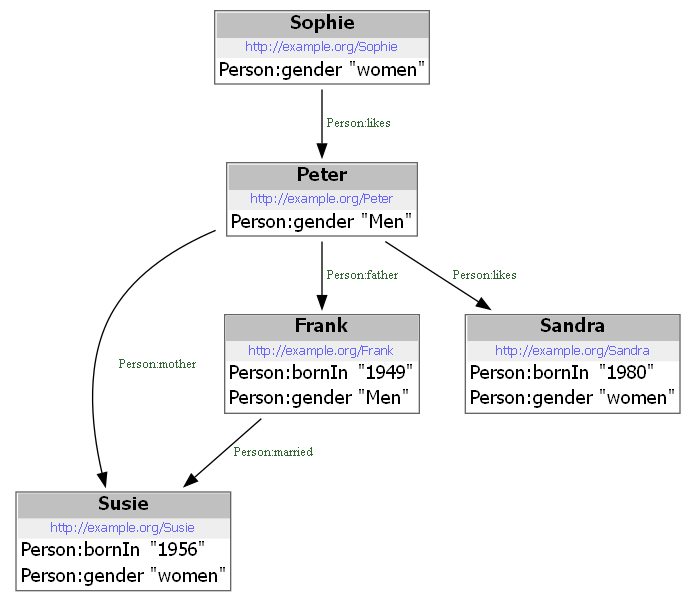

In [51]:
visualize(g)

# Visualization
* 코드 : https://stackoverflow.com/questions/39274216/visualize-an-rdflib-graph-in-python
* GraphViz 문제 발생 시 해결법 : https://ssung-22.tistory.com/3

## Example 1

In [2]:
url = 'https://www.w3.org/TeamSubmission/turtle/tests/test-30.ttl'

In [8]:
g = rdflib.Graph()
g.parse(url, format = 'ttl')

<Graph identifier=Na76c07569a864b5b9e36a5959aae977a (<class 'rdflib.graph.Graph'>)>


(dot.exe:1436): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:1436): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



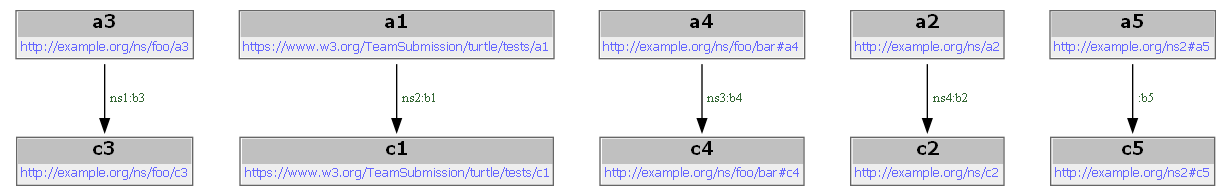

In [9]:
visualize(g)

## Example 2

In [10]:
g = rdflib.Graph()

# Now define the key words that we will use (the edge weights of the graph)
has_border_with = rdflib.URIRef('http://www.example.org/has_border_with')
located_in = rdflib.URIRef('http://www.example.org/located_in')

# define the things - base level objects that will be the nodes
# In this case first we have countries
germany = rdflib.URIRef('http://www.example.org/country1')
france = rdflib.URIRef('http://www.example.org/country2')
china = rdflib.URIRef('http://www.example.org/country3')
mongolia = rdflib.URIRef('http://www.example.org/country4')

# then we have continents
europa = rdflib.URIRef('http://www.example.org/part1')
asia = rdflib.URIRef('http://www.example.org/part2')

# Having defined the things and the edge weights, now assemble the graph
g.add((germany,has_border_with,france))
g.add((china,has_border_with,mongolia))
g.add((germany,located_in,europa))
g.add((france,located_in,europa))
g.add((china,located_in,asia))
g.add((mongolia,located_in,asia))

<Graph identifier=N7e2db83f5989473db965f74a87dbc1a4 (<class 'rdflib.graph.Graph'>)>


(dot.exe:7216): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:7216): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



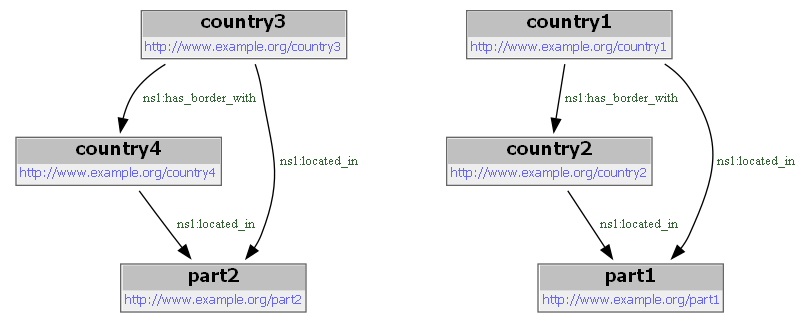

In [11]:
visualize(g)

# Graph to RDF-XML

In [17]:
v = g.serialize(format = "xml", destination = os.path.join(file_dir, 'countries.xml')) #> 그래프 객체를 RDF-XML 파일로 만들어 저장함